**Aplicando a Transformada de Fourier e a Transformada de Wavelet**
====================

> Presentado por

>> *Nelson Roldan Condori Colquehuanca*

> Disciplina:

>> *Álgebra Linear para Ciencia de Dados*

> Idea do Trabalho:

>>
    Reproduzir os exemplos da seção 2.7 do livro Data-driven Science and Engineering 2nd Ed e
    depois aplique métodos de redução de ruído wavelet e compare som limpo, ruidoso e reduzido.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.image import imread
from google.colab import drive
import os
import pywt
import scipy.io.wavfile as wavfile
from IPython.display import Audio
plt.style.use('fivethirtyeight')

# Fourier
A **transformada de Fourier** é uma transformada integral que \"decompõe\" uma função em várias outras. Essas saídas são funções de frequência $\in \mathbb{C}$.
    
$$F(\omega) = \int_{-\infty}^\infty f(t)e^{-j\omega t} dt$$

Essa transformação é frequentemente usada em tratamento do sinais. Por exemplo, digamos que queremos remover ruído de um sinal de rádio.Ao decompor a onda recebida em diversas sub-frequências, podemos identificar qual delas está provocando o ruído, e removê-la.

Depois, basta usar a transformada inversa para reconstruir o sinal original, agora sem o ruído.

$$F^{-1}(\omega) = \frac{1}{2 \pi} \int_{-\infty}^\infty F(\omega) e^{j \omega t} d \omega $$
Faremos um processo similar aqui, só que com imagens.

Para tanto, usaremos a versão 2D e discreta da transformada (DFT). Dada uma imagem de resolução $M \times N$,

$$F(x, y) = \sum_{m=0}^{M-1}\sum_{n=0}^{N-1}f(m, n)e^{-j 2 \pi (x \frac{m}{M} + y\frac{n}{N})}$$

$$F^{-1}(x, y) = \frac{1}{MN} \sum_{m=0}^{M-1} \sum_{n=0}^{N-1} F(x, y) e^{j 2 \pi (x \frac{m}{M} + y \frac{n}{N})},$$

onde $f(m, n)$ é um pixel.

Mais precisamente, usaremos a FFT  
```python
np.fft
```
algoritmos que implementam a DFT e a iDFT com eficiência computacional.

# Exemplos da seção 2.7

Primero llamamos la imagen que se encuentra en *Drive* entonces podemos convertir a escalas grises, donde los valores de pigmentacion  de la imagen e n scala grises toma la varivel $X$.

In [ ]:
image_path="/content/drive/MyDrive/datasets_gerados_flores/dataset_flores_25/flor_17.jpg"
A = imread(image_path)
X = np.mean(A, -1)  # Comvertimos de RGB para grayscale

##Teste das Funções

Provamos las funcion de la libreria de *numpy* para los valores de $X$,

In [ ]:
fhat = np.fft.fft2(X); # 2D FFT
fhat

array([[ 1.31687760e+07     +0.j        ,
         7.78023156e+05  +8243.48703174j,
        -5.90033014e+04-338581.22786094j, ...,
         1.84614120e+04-230519.47773063j,
        -5.90033014e+04+338581.22786094j,
         7.78023156e+05  -8243.48703174j],
       [-1.70930939e+05+442253.81135628j,
        -5.70473601e+05+173065.22703075j,
         6.28915042e+05+559499.6868733j , ...,
         8.87586562e+04 -90049.10646505j,
         2.48679145e+05-445473.17104114j,
        -3.41971860e+05+750086.33557413j],
       [-4.75173156e+05+274935.2456063j ,
         3.07167569e+05 +76054.08232185j,
        -2.73046089e+05+425866.06119477j, ...,
         1.11798469e+04+120599.08022436j,
         2.27291398e+05 -36308.77954663j,
        -8.05716862e+04-232582.30024197j],
       ...,
       [-6.32178400e+05-366467.27279596j,
         3.08567526e+05+145675.62945531j,
         6.13995092e+04 +63800.2147104j , ...,
        -1.04698614e+04 +27060.38277829j,
        -3.37047996e+05-187420.64209978j,

In [ ]:
f = np.fft.ifft2(fhat); # 2D Inversa FFT
f

array([[ 84.33333333+8.14196233e-15j,  85.        +4.34875467e-15j,
         85.33333333-2.04182564e-15j, ...,  79.        -2.67357065e-15j,
         79.        +7.57941671e-15j,  79.        -3.48417943e-15j],
       [ 84.33333333+3.82581394e-15j,  85.        +3.75110240e-15j,
         85.33333333-4.02787205e-15j, ...,  79.        -4.07657041e-15j,
         79.        +5.93294161e-15j,  79.        -1.60884997e-16j],
       [ 85.33333333+9.74068348e-15j,  86.33333333+1.17897161e-14j,
         85.33333333+4.78727954e-15j, ...,  79.        +7.57502144e-15j,
         79.        +1.48526111e-14j,  79.        +1.17382295e-15j],
       ...,
       [ 95.33333333+1.27486771e-15j, 100.        -6.37799939e-15j,
         95.33333333-1.02615041e-14j, ...,  81.66666667+2.91878184e-17j,
         81.33333333+6.90849870e-15j,  71.        -1.36099990e-14j],
       [103.33333333+8.22227922e-15j, 102.33333333+9.63442566e-15j,
         95.        -3.67421574e-15j, ...,  89.33333333-1.42898871e-16j,
       

In [ ]:
# valores de X
X

array([[ 84.33333333,  85.        ,  85.33333333, ...,  79.        ,
         79.        ,  79.        ],
       [ 84.33333333,  85.        ,  85.33333333, ...,  79.        ,
         79.        ,  79.        ],
       [ 85.33333333,  86.33333333,  85.33333333, ...,  79.        ,
         79.        ,  79.        ],
       ...,
       [ 95.33333333, 100.        ,  95.33333333, ...,  81.66666667,
         81.33333333,  71.        ],
       [103.33333333, 102.33333333,  95.        , ...,  89.33333333,
         89.33333333,  70.33333333],
       [107.33333333, 102.33333333,  96.33333333, ...,  95.        ,
         93.66666667,  72.66666667]])

observamos que los valores de la imagen de $X$ pertenecen a los $\mathbb{R}$, pero al aplicar FFT e luego la inversa  de FFT tenemos que los valores aumenta un numero imaginario que tiende a aproximarse al cero.

## Semántica de  2D FFT.

Primeiro, a FFT é obtida de cada linha e, em seguida, a FFT é obtida de
cada coluna da matriz transformada resultante.

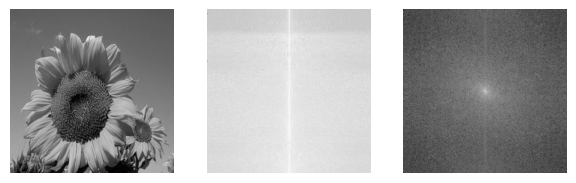

In [ ]:
fig,axs = plt.subplots(1,3)
# Plot imagem
img = axs[0].imshow(X)
img.set_cmap('gray')
axs[0].axis('off')

# Compute row-wise FFT

Cshift = np.zeros_like(X,dtype='complex')
C = np.zeros_like(X,dtype='complex')

for j in range(X.shape[0]):
    Cshift[j,:] = np.fft.fftshift(np.fft.fft(X[j,:]))
    C[j,:] = np.fft.fft(X[j,:])

img = axs[1].imshow(np.log(np.abs(Cshift)))
img.set_cmap('gray')
axs[1].axis('off')

# Compute column-wise FFT

D = np.zeros_like(C)
for j in range(C.shape[1]):
    D[:,j] = np.fft.fft(C[:,j])

img = axs[2].imshow(np.fft.fftshift(np.log(np.abs(D))))
img.set_cmap('gray')
axs[2].axis('off')

plt.show()

# Much more efficient to use fft2
D = np.fft.fft2(X)

## Compressão de imagem via FFT

Imagem compactada usando vários *thresholds* para *keep* 10%, 5%, 1% e 0,2% dos maiores coeficientes de Fourier.

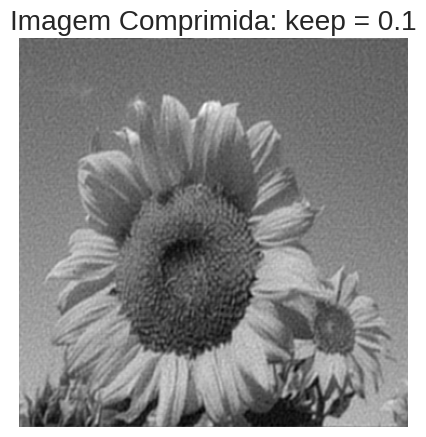

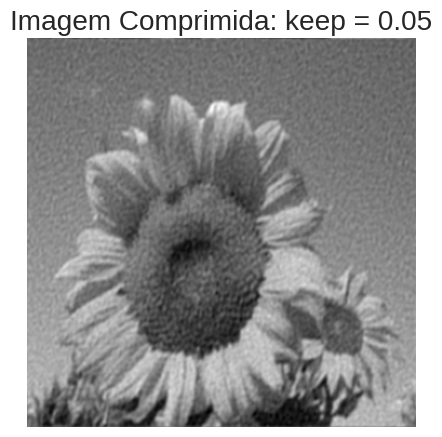

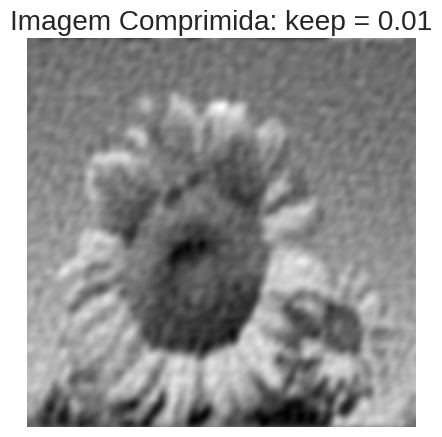

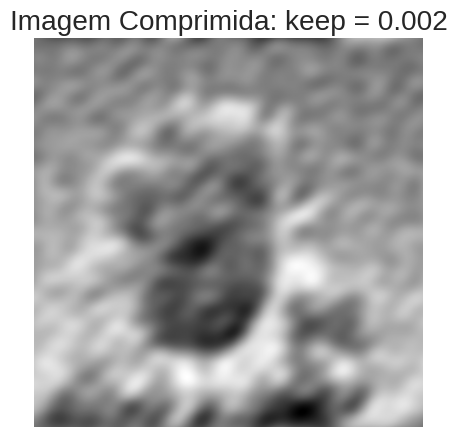

In [ ]:
Bt = np.fft.fft2(X)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort para magnitude

for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Encontrar pequenhos indices
    Atlow = Bt * ind                 # Threshold pequenhos indices
    Alow = np.fft.ifft2(Atlow).real  # Imagem comprimida
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Imagem Comprimida: keep = ' + str(keep))

Una de las aplicaciones de las FFT es filtrar  las senhales de ruido, para eso aumentamos ruido a la imagen principal pa ra tener en consideracion esta aplicación.


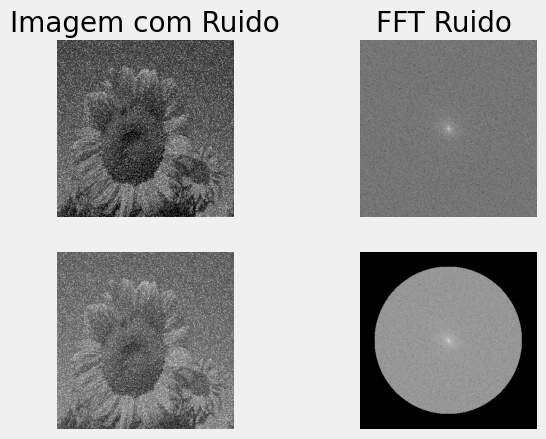

In [ ]:
## Denoise
Bnoise = X + 200*np.random.randn(*X.shape).astype('uint8')
Bt = np.fft.fft2(Bnoise)
Btshift = np.fft.fftshift(Bt)
F = np.log(np.abs(Btshift)+1) # FFT em log scale

fig,axs = plt.subplots(2,2)

axs[0,0].imshow(Bnoise,cmap='gray')
axs[0,0].set_title('Imagem com Ruido')
axs[0,0].axis('off')

axs[0,1].imshow(F,cmap='gray')
axs[0,1].set_title('FFT Ruido ')
axs[0,1].axis('off')

nx,ny = X.shape
X,Y = np.meshgrid(np.arange(-ny/2+1,ny/2+1),np.arange(-nx/2+1,nx/2+1))
R2 = np.power(X,2) + np.power(Y,2)

ind = R2 < 150**2
Btshiftfilt = Btshift * ind
Ffilt = np.log(np.abs(Btshiftfilt)+1) # Put FFT on log scale

axs[1,1].imshow(Ffilt,cmap='gray')
axs[1,1].axis('off')

Btfilt = np.fft.ifftshift(Btshiftfilt)
Bfilt = np.fft.ifft2(Btfilt).real
axs[1,0].imshow(Bfilt,cmap='gray')
axs[1,0].axis('off')

plt.show()

Redução de ruído em uma imagem, eliminando coeficientes de Fourier de alta frequência fora
de um determinado raio (canto inferior direito).

##Transformada Wavelet Bidimensional para Imagens

Al igual que la FFT, la DWT es usada para prosesamiento y compresion de imagenes.

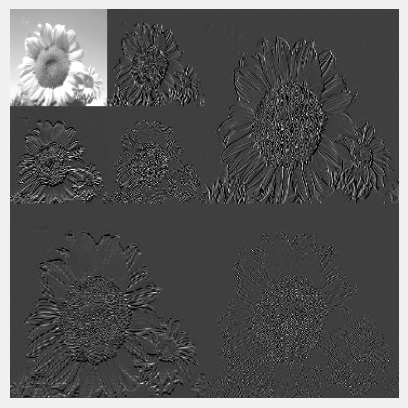

In [ ]:
## Descomposição do Wavelet (2 level)
n = 2
w = 'db1'
coeffs = pywt.wavedec2(X,wavelet=w,level=n)
# Normaliza cada Coeficiento do array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in
        coeffs[detail_level + 1]]
arr, coeff_slices = pywt.coeffs_to_array(coeffs)
plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.axis('off')
plt.show()

la DWT es una forma de descompsicion de las imagenes de como vemos  ela  la desconpone en 2 niveles , es decir reduce la imagen.

Mostramos la version de compresion de imgen para varios *kepp*. Mesmo com um truncamento agressivo, retendo
apenas 0,5% dos coeficientes DWT, as características grosseiras da imagem são preservadas. Assim,
ao transmitir dados, mesmo que a largura de banda seja limitada e grande parte das informações DWT sejam
truncadas, as características mais importantes dos dados são transferidas.

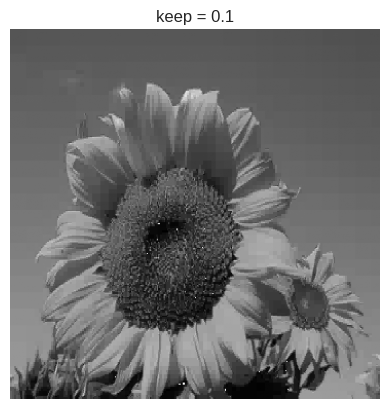

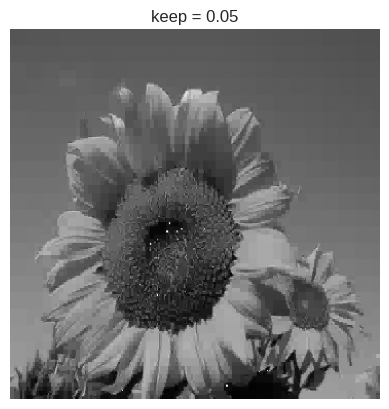

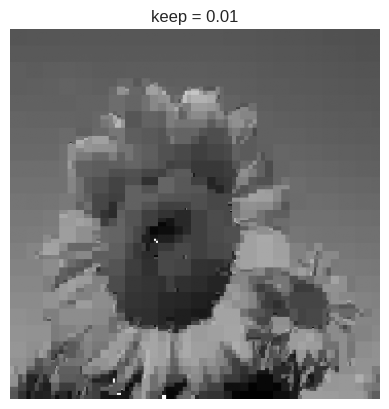

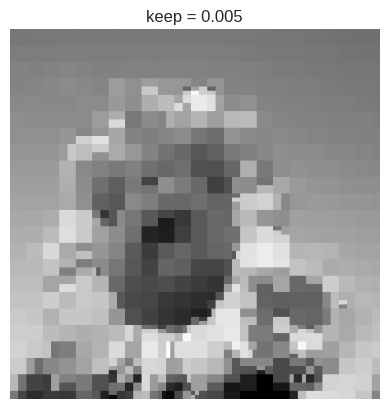

In [ ]:
n = 4
w = 'db1'
coeffs = pywt.wavedec2(X,wavelet=w,level=n)
coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
Csort = np.sort(np.abs(coeff_arr.reshape(-1)))
for keep in (0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind # Threshold small indices
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices, output_format='wavedec2')

    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('keep = ' + str(keep))

# FFT e DWT para um Audio com Ruído.

Usaremos el audio *LJ037-0171.wav* descargado del siguiente dataset [The LJ Speech Dataset](https://keithito.com/LJ-Speech-Dataset/)

Presentamos primero las    caracteristicas del audio, y graficas que nos ayude a entender,

data ->  [-15 -14  -6 ...   1  -3 -30]
data length ->  167226
np.arange(len(data)) ->  [     0      1      2 ... 167223 167224 167225]
float(samplerate) ->  22050.0
time ->  [0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 7.58380952e+00
 7.58385488e+00 7.58390023e+00]


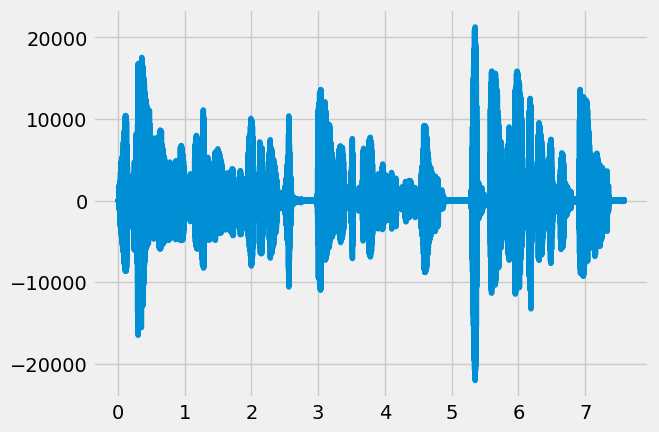

In [ ]:
fs, data = wavfile.read('/content/drive/MyDrive/Colab Notebooks/Álgebra Linear CD 2025/Datos/LJ037-0171.wav');
t = np.arange(0 , len(data)) / fs;  # Recuperando o Tempo

# Carateristicas do audio
print("data -> ", data)
print("data length -> ", len(data))
print("np.arange(len(data)) -> ", np.arange(len(data)))
print("float(samplerate) -> ", float(fs))
print("time -> ", t)

plt.plot(t, data)

## Primeiro usaremos FFT para analizar o audio

1.   Primero normlizamos los datos del audio para que todo sea estandar, ademas estos valores sean compatibles con las operaciones que pretendemos realizar.

In [ ]:
data_float = data.astype(float)
max_abs_val = np.max(np.abs(data_float))
if max_abs_val > 0:
    normalized_data = data_float / max_abs_val
else:
    normalized_data = data_float

2.   Anhadimos ruido a nuestros datos normalizados para luego proceder con FFT.



In [ ]:
# Añadir Ruido
noise_factor =0.05
noisy_audio = normalized_data + noise_factor * np.random.randn(len(data))

3. Entonces estamos preparados para aplicar la FFT para enteder como reduce el ruido para el audio, por esos tenemos que  evaluar para varios *keep* para suprimir los valores minimos.   



Audio Original:



Audio com Ruido:


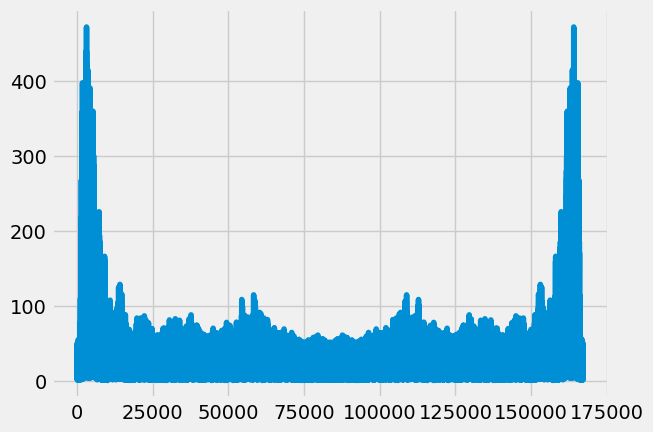


 for thresh =27.499940194696077

Audio com Filtro de:keep = 0.4


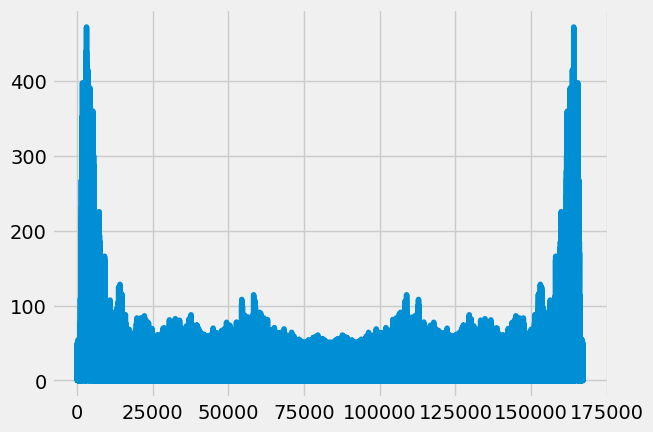


 for thresh =53.625004879585696

Audio com Filtro de:keep = 0.1


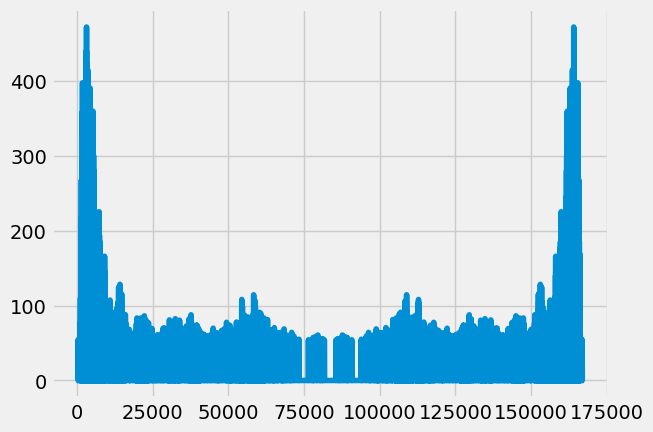


 for thresh =80.37236970398287

Audio com Filtro de:keep = 0.05


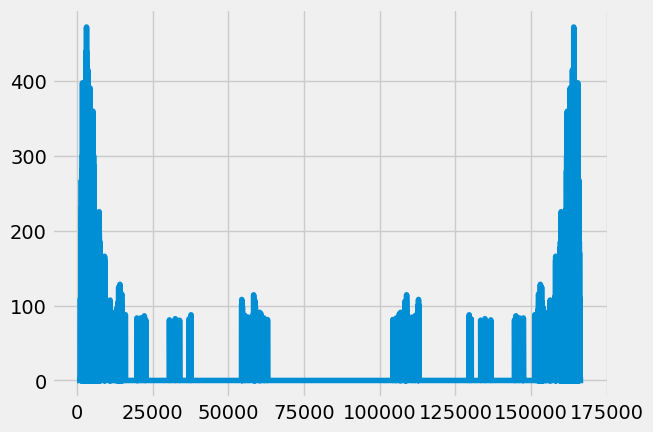


 for thresh =189.21257519419672

Audio com Filtro de:keep = 0.01


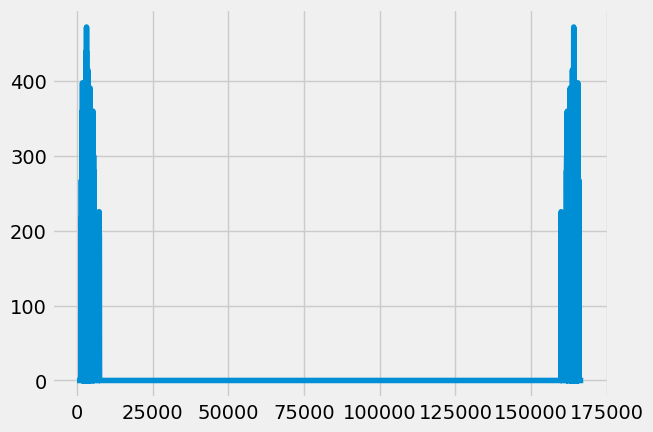

In [ ]:
# Aplicar FFT
n = len(noisy_audio )
# FFT da senhal com ruido
noisy_fft = np.fft.fft(noisy_audio)
Btsort = np.sort(np.abs(noisy_fft.reshape(-1))) # classificar por magnitude
print("Audio Original:")
display(Audio(data=data, rate=fs))

print("\nAudio com Ruido:")
display(Audio(data=noisy_audio, rate=fs))
plt.plot(np.abs(noisy_fft))
plt.show()
# Zere todos os coeficientes pequenos e faça a transformação inversa
for keep in (0.4, 0.1, 0.05, 0.01):
  thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
  print("\n for thresh =" + str(thresh))
  ind = np.abs(noisy_fft)>thresh
  Atlow = noisy_fft * ind                 #  classificar por magnitude
  Alow = np.fft.ifft(Atlow).real  # Imagem compactada
  # Ouça os resultados
  print("\nAudio com Filtro de:keep = "+ str(keep))
  display(Audio(data=Alow, rate=fs))
  # Visualizando e Reproduzindo
  plt.plot(np.abs(Atlow))
  plt.show()

A FFT também deixa o gráfico lisinho, uma beleza de se ver. Parece que o trabalho foi feito. Mas é no som que a gente sente o peso da lâmina. Ao dar o play, o ruído de alta frequência some, sim. Só que ele leva junto um pedaço do áudio. O som fica abafado, sem vida, como se estivesse falando de dentro de uma caixa. Por quê? Porque naquela frequência alta que a FFT cortou, morava não só o chiado do ruído, mas também os sons que dão brilho e clareza à nossa voz.

## Aplicamos DWT en el audio con ruido.


Ouvindo o áudio Ruidoso:


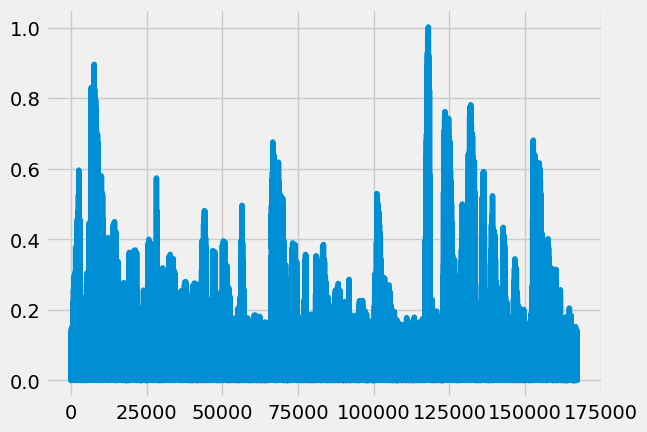


Ouvindo o áudio com Ruído Reduzido: keep = 0.4


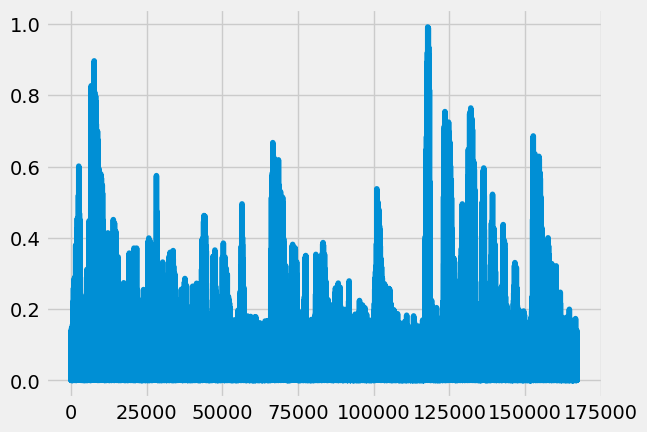


Ouvindo o áudio com Ruído Reduzido: keep = 0.1


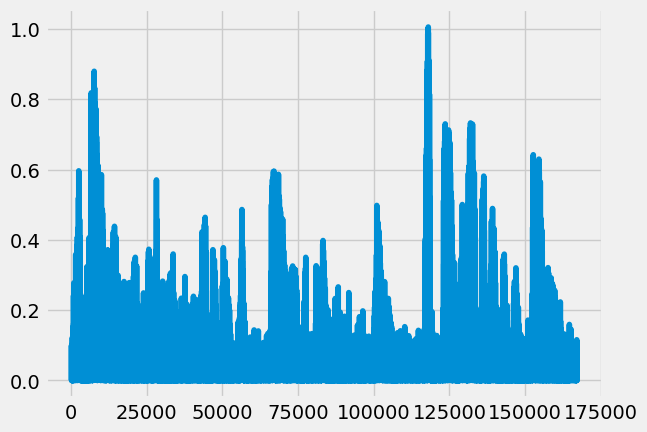


Ouvindo o áudio com Ruído Reduzido: keep = 0.05


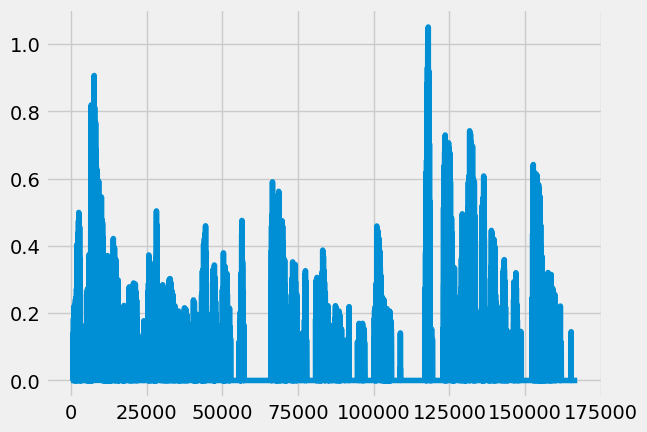


Ouvindo o áudio com Ruído Reduzido: keep = 0.01


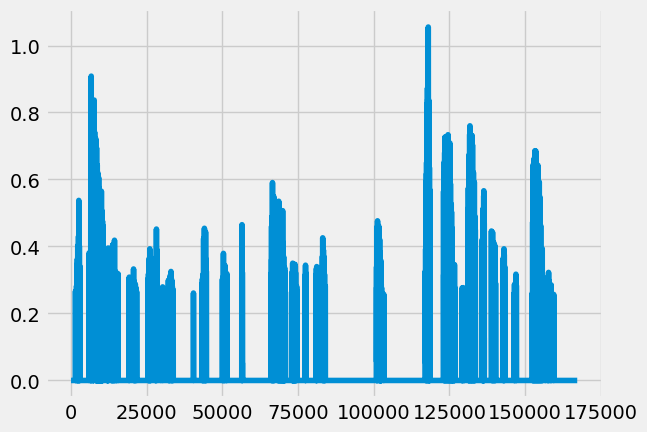

In [ ]:
print("\nOuvindo o áudio Ruidoso:")
display(Audio(noisy_audio , rate=fs))# Parâmetros da wavelet
plt.plot(np.abs(noisy_audio))
plt.show()
n = 2               # Nível de decomposição
w = 'db4' #'db4'           # Wavelet
# Decomposição Wavelet
coeffs = pywt.wavedec(noisy_audio, wavelet=w, level=n)
# Preparar coeficientes para thresholding
coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
# Calcular o limiar (threshold)
Csort = np.sort(np.abs(coeff_arr.reshape(-1)))
for keep in (0.4, 0.1, 0.05, 0.01):
  thresh = Csort[int(np.floor((1 - keep) * len(Csort)))]
  # Aplicar o threshold (hard thresholding)
  ind = np.abs(coeff_arr) > thresh
  Cfilt = coeff_arr * ind

  # Reconstruir a estrutura de coeficientes
  coeffs_filt = pywt.array_to_coeffs(Cfilt, coeff_slices, output_format='wavedec')

  # Reconstrução do sinal 1D
  denoised_signal = pywt.waverec(coeffs_filt, wavelet=w)

  # Ajustar o comprimento do sinal reconstruído (pode variar ligeiramente)
  denoised_signal = denoised_signal[:len(data )]
  # Audição
  print("\nOuvindo o áudio com Ruído Reduzido: keep = " + str(keep))
  display(Audio(denoised_signal, rate=fs))
  # Plot
  plt.plot(np.abs(denoised_signal))
  plt.show()

**Observações do Experimento:**
A aplicação da Transformada Wavelet Discreta (DWT), utilizando a wavelet *sym8* com 4 níveis de decomposição, demonstrou eficácia na atenuação de ruído gaussiano adicionado a um sinal de áudio. A efetividade do método, contudo, mostrou-se estritamente dependente do limiar de retenção de coeficientes, parametrizado pela variável *keep*.

**Análise Visual**:
Para valores de keep elevados (e.g., 0.1), a forma de onda do sinal filtrado exibe uma morfologia muito similar à do sinal ruidoso. As oscilações de alta frequência, características do ruído, permanecem visualmente evidentes, indicando uma filtragem insuficiente. À medida que o valor de keep é reduzido (e.g., para 0.05), a forma de onda resultante é visivelmente suavizada. Os picos erráticos dão lugar a um contorno que se aproxima com maior fidelidade à estrutura do sinal original, sugerindo uma remoção de ruído bem-sucedida. Em valores de keep excessivamente baixos (e.g., 0.01), a onda torna-se excessivamente lisa, perdendo detalhes finos e transientes que compunham o sinal original, o que caracteriza uma perda de informação relevante.

**Análise Auditiva:**
A percepção sonora corrobora a análise visual. Com keep=0.1, o ruído de fundo é proeminente e compete com a inteligibilidade do áudio. Em *keep*=0.05, a melhora na relação sinal-ruído é notável; o chiado é drasticamente reduzido, e o sinal de interesse emerge com clareza. Com keep=0.01, o silêncio de fundo é quase total, mas o áudio adquire uma qualidade artificial, descrita como "abafada" ou "metalizada", resultado direto da eliminação de harmônicos de alta frequência que são essenciais para a textura natural do som.

## Minha percepção

Sabe aquela sensação de que o resultado é bom, mas não perfeito? Foi o que sentimos com as wavelets, naquela arte de equilibrar a limpeza e a alma do som. Mas para entender de verdade o valor desse "bisturi", nada como comparar com uma ferramenta mais... direta. E essa ferramenta é a FFT.

Se a Wavelet é um cirurgião que remove células de ruído com cuidado, a FFT age como uma guilhotina. Ela não pergunta, não analisa. Ela simplesmente define uma linha — a "frequência de corte" — e corta tudo o que está acima dela. Sem dó nem piedade.